In [1]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

Считываем граф

In [21]:
A = np.load('sarov_matrix.npy')

Выкидываем висячие вершины, если хотим

In [3]:
while (0 in sum(A)):
    index = (sum(A) > 0)
    A = A[np.ix_(index, index)]

In [22]:
np.shape(A)

(1000, 1000)

In [23]:
0 in sum(A)

True

нормируем столбцы матрицы А

In [24]:
from sklearn.preprocessing import normalize

In [25]:
A_norm = normalize(A, axis= 0 , norm='l1')

In [26]:
np.save('prepared_sarov_matrix', A_norm)

In [27]:
N = len(A_norm)
N

1000

Приведем матрицу к формату CSR

In [28]:
import scipy.sparse as sparse

In [29]:
A_norm_csr = sparse.csr_matrix(A_norm)

начальное приближение

In [30]:
p = np.array([1/N for _ in range(N)])

In [31]:
eps = 0.15

In [32]:
delta = 1e-10

In [33]:
y_i = A_norm_csr.dot(p * (1 - eps)) + np.array([np.sum(p) * eps / N for _ in range(N)])
p1 = y_i / sum(y_i)

In [34]:
iter = 0

while (np.linalg.norm(p-p1) > 1e-10):
    y_i = A_norm_csr.dot(p1 * (1 - eps)) + np.array([np.sum(p1) * eps / N for _ in range(N)])
    p = p1
    p1 = y_i / sum(y_i)
    iter += 1
    
print(iter)

191


In [35]:
steps = np.array([10 ** i for i in range(1, 4)])
epsilons = np.zeros(3)
len(steps)
steps
import math

In [36]:
for i in range(0, 3):
    p = np.array([1/N for _ in range(N)])
    y_i = A_norm_csr.dot(p * (1 - eps)) + np.array([np.sum(p) * eps / N for _ in range(N)])
    p1 = y_i / sum(y_i)
    
    for j in range(steps[i]):
        y_i = A_norm_csr.dot(p1 * (1 - eps)) + np.array([np.sum(p1) * eps / N for _ in range(N)])
        p = p1
        p1 = y_i / sum(y_i)
        
    epsilons[i] = math.log10(np.linalg.norm(p-p1))

Text(0.5, 1.0, 'график зависимости ошибки от числа итераций в логарифмическом масштабе')

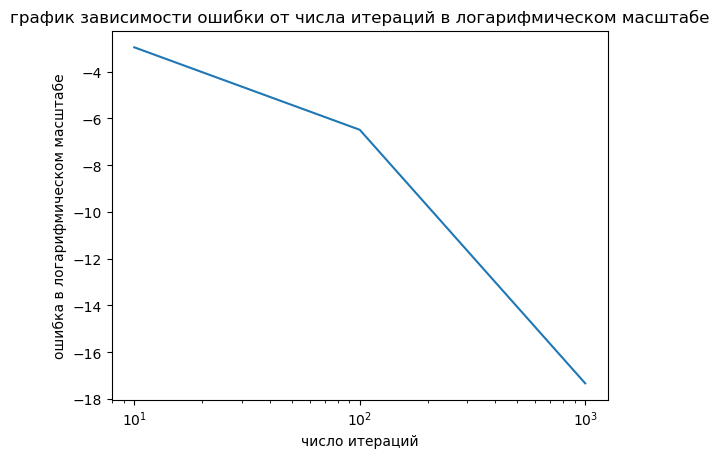

In [44]:
fig, ax = plt.subplots()
ax.semilogx(steps, epsilons)
ax.set_ylabel("ошибка в логарифмическом масштабе")
ax.set_xlabel("число итераций")
ax.set_title("график зависимости ошибки от числа итераций в логарифмическом масштабе")

In [45]:
import networkx as nx

In [46]:
rows, cols = np.where(A==1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_nodes_from(range(len(p)))
G.add_edges_from(edges)

In [47]:
pos = nx.spring_layout(G, seed=3113794652, k=0.6)

In [48]:
nodes_colors = np.zeros(N, dtype=float)
for i, e in enumerate(p):
        nodes_colors[i] = e
nodes_sizes = nodes_colors / nodes_colors.max() * 1000

In [49]:
print("Total number of nodes: ", int(G.number_of_nodes())) 

Total number of nodes:  1000


In [50]:
options = {
    'node_size': 100,          # size of node
    'width': 1,  # line width of edges
    'edge_color':'blue',        # edge color
}

In [51]:
for i in list(G.nodes()): 
    G.nodes[i]['popularity'] = p[i] 

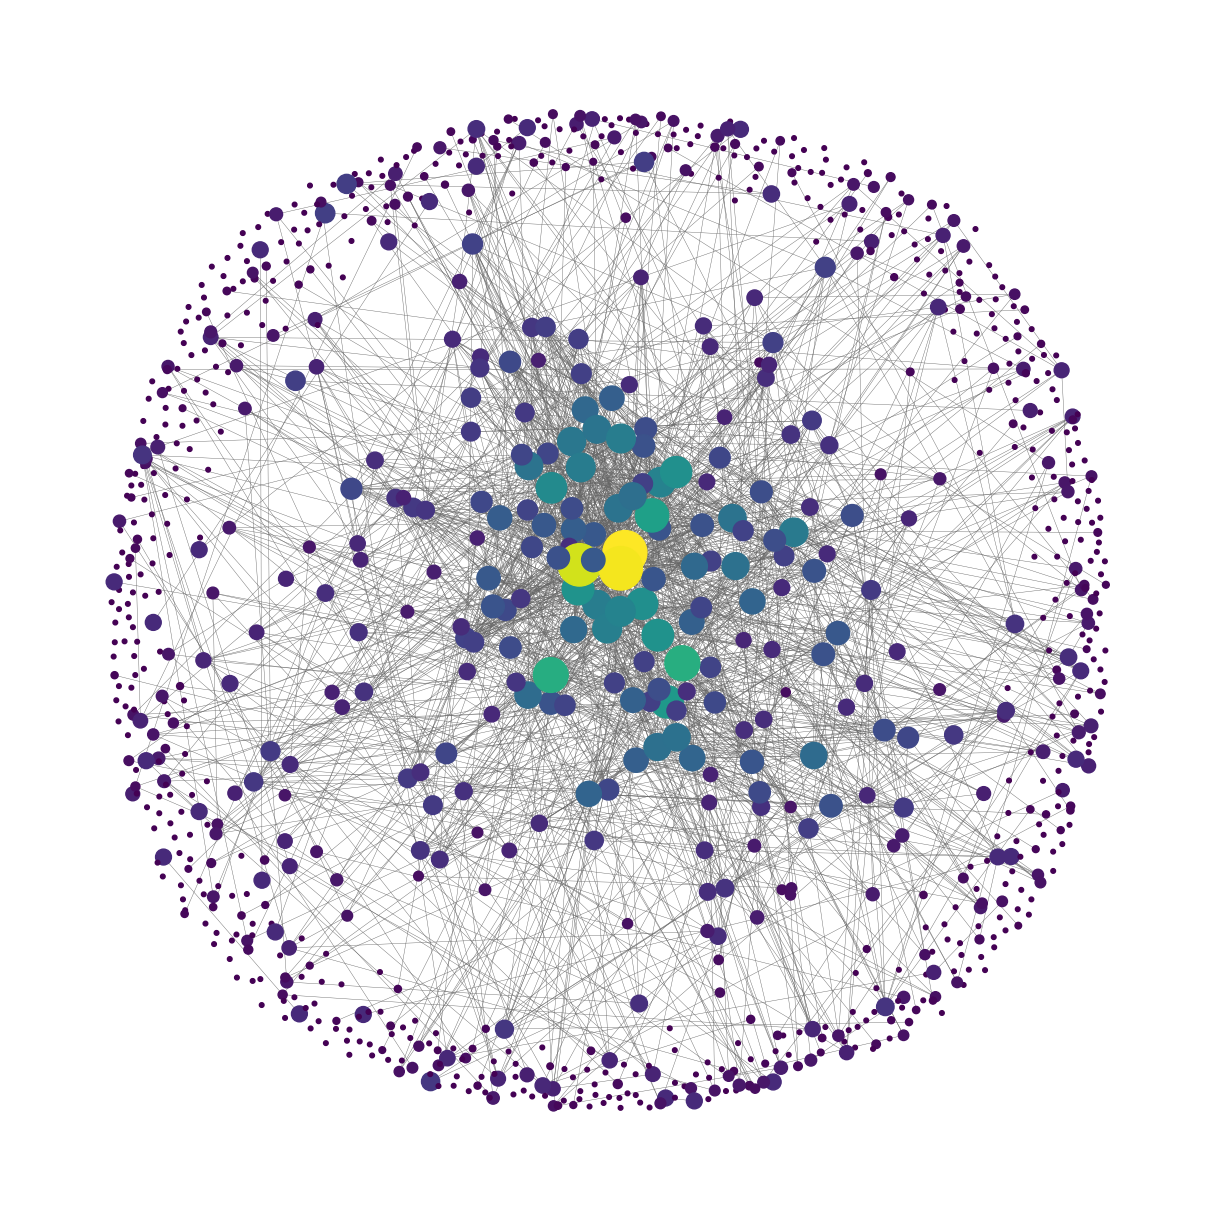

In [52]:
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=nodes_sizes, node_color=nodes_sizes, edge_color ='.4', width=0.3)
plt.savefig('Graf', dpi=1000)
plt.show()

In [53]:
count_of_links = sum(A)

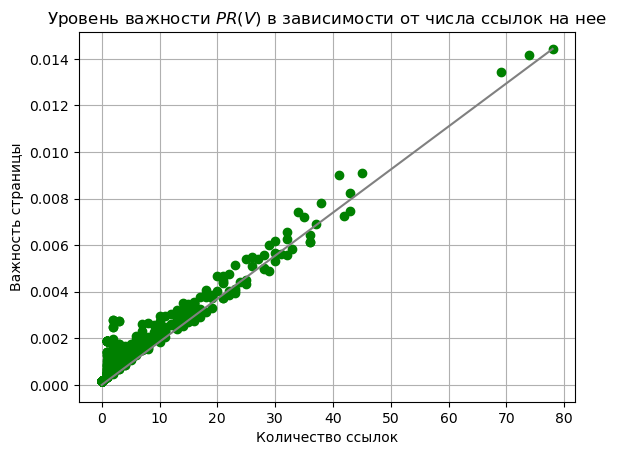

In [54]:
plt.plot(count_of_links, p, 'go')
plt.plot([0, max(count_of_links)], [0, max(p)], color='grey')
plt.title('Уровень важности $PR(V)$ в зависимости от числа ссылок на нее')
plt.xlabel('Количество ссылок')
plt.ylabel('Важность страницы')
plt.grid(True)
plt.savefig('PR(V).png', dpi=600)
plt.show()